# Module 2: Data Analysis
## Sprint 1: Introduction to SQL & Statistics Fundamentals
## Part 5: Analysis of the Mental Health in the Tech Industry


# Project
## Mental Health in the Tech Industry Analysis

## Introduction

This file presents

**Exploratory Data Analysis of Mental Health in the Tech Industry.**

The aim of this analysis is:
*   to assess how big is the scale of health issues among tech professionals,
*   to check if companies are aware of that issues and whether there is appropriate help for employees,
*   to investigate if tech professionals work under a pressure, 
*   to study how often depression is presented among tech workers
and many more.

Many think that working in tech industry is a real paradise on earth, let's check if that statement is true.


First part of the project includes:

* importing libraries,
* loading a dataset,
* getting familiar with the dataset,
* preparing data for further analysis.

## Importing all necessary modules

In [ ]:
# Connection with Google Drive
from google.colab import drive

# Connection to sqlite files
import sqlite3

# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Data visualization
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#@title
def barplot(df_plot: pd.DataFrame, x: str, y: str, color: str):
  '''Creating a barplot'''

  sns.set(rc={'figure.figsize':(10,8)})
  sns.set_style("white")
  axis = sns.barplot(data=df_plot, x=x, y=y, color=color)
  sns.despine(bottom=True,
            left=True)
  annotate_bars(axis)
  axis.set(yticklabels=[])
  axis.set_xlabel('')
  axis.grid(False)

def annotate_bars(bars: str):
  '''Annotate horizontal graphs'''

  for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=12, xytext=(1, 7),
                  textcoords='offset points')
  return

In [ ]:
sns.set_theme(context='notebook', style='white')

## Loading the database

In [ ]:
drive.mount("/content/drive")

con = sqlite3.connect("/content/drive/MyDrive/mental_health.sqlite")

questions_df = pd.read_sql_query("SELECT * from Question", con)

answers_df = pd.read_sql_query("SELECT * from Answer", con)
answers_df.columns = ['AnswerText', 'SurveyID',	'UserID', 'questionid']

surveys_df = pd.read_sql_query("SELECT * from Survey", con)

Mounted at /content/drive


##Description of the database

Displaying the content of the 3 tables included in the database.

Dataframe **"Questions"** lists all the questions with their IDs.

In [ ]:
questions_df.loc[:9].style.set_properties(**{'text-align': 'left'})

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


Dataframe **"Answers"** represents all answers given in each survey. It includes information about a year of the survey and the User IDs.

In [ ]:
pd.set_option('display.max_colwidth', 30)
answers_df.head()

,AnswerText,SurveyID,UserID,questionid
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


Dataframe **"Surveys"** lists all the years that the surveys were taken.

In [ ]:
surveys_df.head()

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


To investigate the patterns in the answers and generally recognize what is the mental condition of tech professionals, I both created SQL queries and I merged questions and answers dataframe together to use some pandas functions.

In [ ]:
questions_answers = pd.merge(
    answers_df, questions_df, how='left', on='questionid')

In [ ]:
questions_answers.head()

,AnswerText,SurveyID,UserID,questionid,questiontext
0,37,2014,1,1,What is your age?
1,44,2014,2,1,What is your age?
2,32,2014,3,1,What is your age?
3,31,2014,4,1,What is your age?
4,31,2014,5,1,What is your age?


Surveys took place in 2014, 2016-2019 years. I will investigate what was the number of participants each year and also what was the number of questions (to check if questions were the same).

In [ ]:
number_of_participants = pd.read_sql_query(
        '''
        SELECT SurveyID AS Year, 
               COUNT(DISTINCT UserID) AS Nr_of_participants
        FROM Answer
        GROUP BY SurveyID
        ORDER BY 1
        ''', con)

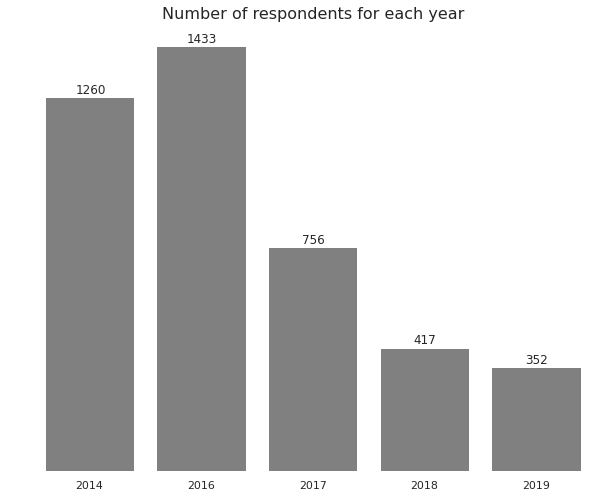

In [ ]:
barplot(df_plot=number_of_participants, x='Year', y='Nr_of_participants', 
        color='grey')

plt.subplots_adjust(top=0.9)
plt.title('Number of respondents for each year', fontdict={'fontsize': 16})
plt.ylabel(' ');

In [ ]:
number_of_questions = pd.read_sql_query(
        '''
        SELECT SurveyID AS Year, 
               COUNT(DISTINCT questionid) AS Nr_of_questions
        FROM Answer
        GROUP BY SurveyID
        ORDER BY 1
        ''', con)

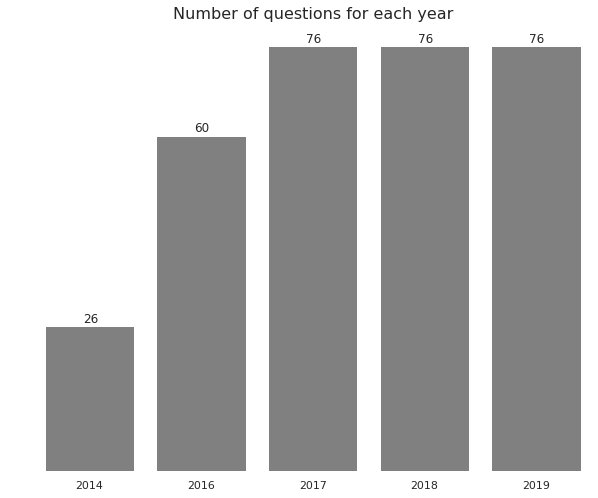

In [ ]:
barplot(df_plot=number_of_questions, x='Year', y='Nr_of_questions', 
        color='grey')

plt.subplots_adjust(top=0.9)
plt.title('Number of questions for each year', fontdict={'fontsize': 16})
plt.ylabel(' ');

The number of participants for each of the survey for the following year decreases. It started with the high amount of participants in 2014 and 2016 and dropped dramatically in 2019. The opposite trend is regarding number of questions. First survey asked only 26 of them, and from 2017 the number of questions was stable and equal to 76.



---



#General description of the survey's participants

First step in the analysis of mental health of IT professionals is to get familiar with the demographic spectrum of participants. I will closely look into:
* gender,
* the age of the participants,
* race, 
* the origin of the participants,
* the size and location of companies they work for.


### Gender analysis of survey's respondents.

Extraction of the answer from Question 2 (the gender of respondents).

In [ ]:
gender_by_year = questions_answers.query("questionid == 2")
gender_by_year.groupby("UserID");


Checking for all possible answers in questions about the gender.

In [ ]:
gender_by_year.groupby('AnswerText').filter(
    lambda x: len(x) >=2)['AnswerText'].value_counts()

Male              2830
Female             914
male               212
female             110
-1                  24
Nonbinary            8
non-binary           6
Genderqueer          4
Agender              4
None                 3
Non-binary           3
Genderfluid          3
Trans man            2
Non binary           2
Other                2
Female (trans)       2
Trans woman          2
Enby                 2
Male-ish             2
agender              2
Name: AnswerText, dtype: int64

Taking a quick look into the gender of the participants forced me to perform a quick and simple data cleaning.

In [ ]:
replace_values = {'male': 'Male', 'female': 'Female'}

gender_by_year = gender_by_year.replace(
    {'AnswerText': replace_values})

In [ ]:
gender_by_year.loc[gender_by_year['AnswerText'].value_counts(
    )[gender_by_year['AnswerText']].values < 25, 'AnswerText'] = "Other"

In [ ]:
gender_by_year['AnswerText'].value_counts()

Male      3042
Female    1024
Other      152
Name: AnswerText, dtype: int64

In [ ]:
#@title
plot_gender = gender_by_year.groupby(
    ['SurveyID', 'AnswerText'])['AnswerText'].value_counts()

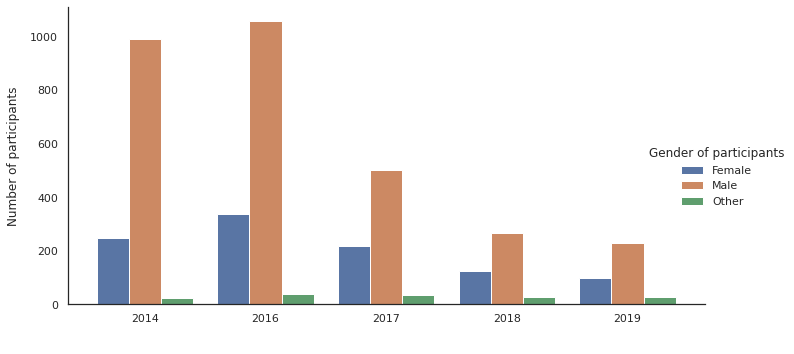

In [ ]:
g = sns.catplot(x='SurveyID', data=gender_by_year, aspect=2.0, kind='count',
                    hue='AnswerText')

g.set_axis_labels(' ', 'Number of participants', labelpad=10)
g.legend.set_title('Gender of participants')
g.ax.margins(.05)

Across all years of mental health tech professional survey's, there is a clear predominance of male participants (about 3x more than female respondents in 2014 and 2016, about 2x more in 2017, 2018 and 2019). Each year there are about the same number of people who identified themselves as neither female, nor male (total 152 people across years). 

### Age of participants

In [ ]:
participants_by_age = questions_answers.query("questionid == 1")
participants_by_age.groupby("UserID")
participants_by_age.head()

,AnswerText,SurveyID,UserID,questionid,questiontext
0,37,2014,1,1,What is your age?
1,44,2014,2,1,What is your age?
2,32,2014,3,1,What is your age?
3,31,2014,4,1,What is your age?
4,31,2014,5,1,What is your age?


In [ ]:
participants_by_age = participants_by_age.astype({
    'AnswerText': float})

In [ ]:
participants_by_age['AnswerText'].describe().to_frame()

,AnswerText
count,4218.000000
mean,33.915363
std,10.478054
min,-29.000000
25%,28.000000
50%,33.000000
75%,38.000000
max,329.000000


In [ ]:
Q1 = participants_by_age['AnswerText'].quantile(0.25)
Q3 = participants_by_age['AnswerText'].quantile(0.75)
IQR = Q3 - Q1

outliers_participants = (participants_by_age['AnswerText'] < (Q1 - 1.5 * IQR)) \
| (participants_by_age['AnswerText'] > (Q3 + 1.5 * IQR))

((participants_by_age['AnswerText'] < (Q1 - 1.5 * IQR)) \
| (participants_by_age['AnswerText'] > (Q3 + 1.5 * IQR))).sum()

124

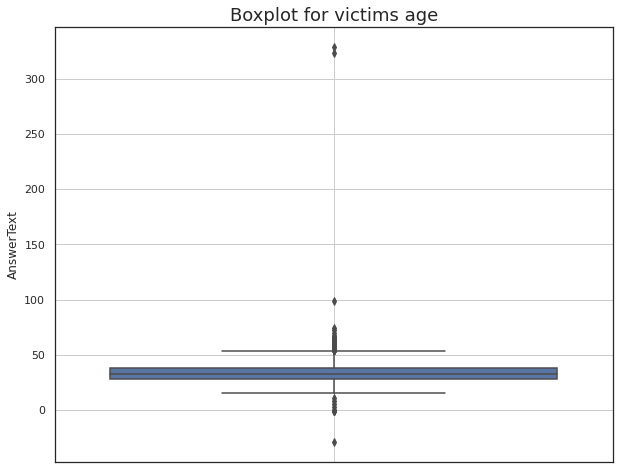

In [ ]:
g = sns.boxplot(x=None, y=participants_by_age['AnswerText'])
g.set_title("Boxplot for victims age", fontsize=18)
g.grid(True);

At first sight, from the boxplot, I can see that there are some invalid inputs for age (no one can have 'minus' years or be older than 120). I decided to delete values under 12 and above 90.

In [ ]:
participants_by_age.loc[
  ((participants_by_age['AnswerText'] < 12) \
  | (participants_by_age['AnswerText'] > 90)), 'AnswerText'] = 34

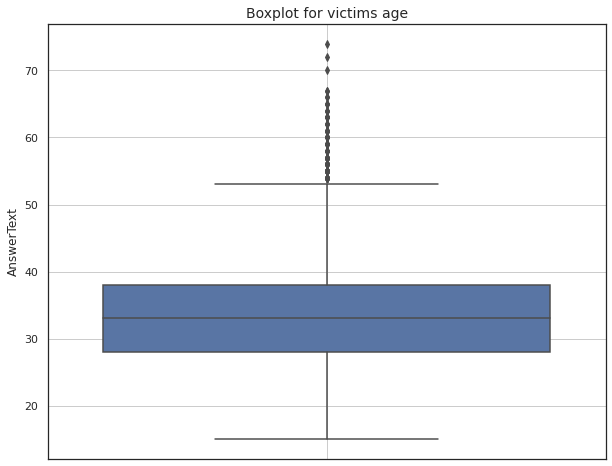

In [ ]:
g = sns.boxplot(x=None, y=participants_by_age['AnswerText'])
g.set_title("Boxplot for victims age", fontsize=14)
g.grid(True);

In [ ]:
participants_by_age['AnswerText'].describe().to_frame()

,AnswerText
count,4218.000000
mean,33.851826
std,8.059130
min,15.000000
25%,28.000000
50%,33.000000
75%,38.000000
max,74.000000


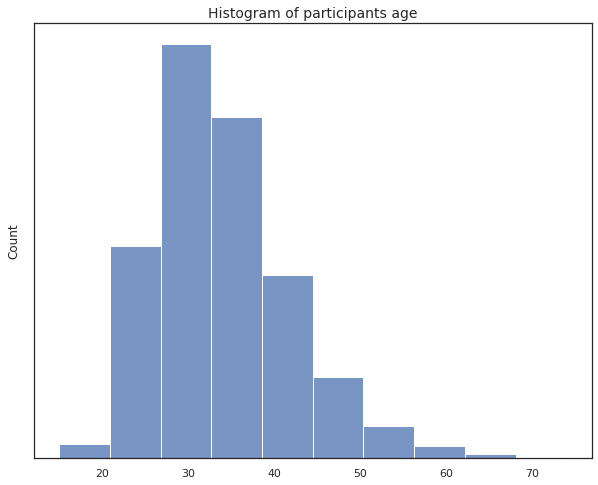

In [ ]:
g = sns.histplot(data=participants_by_age, x='AnswerText', bins=10)

g.set_title('Histogram of participants age', fontsize=14)
g.set(yticklabels=[], xlabel='')
g.grid(False)

In [ ]:
participants_by_age_years = participants_by_age.groupby(
    participants_by_age['SurveyID'])[['SurveyID','AnswerText']].agg('mean')

In [ ]:
participants_by_age_years

,SurveyID,AnswerText
SurveyID,,
2014,2014.0,32.096032
2016,2016.0,34.060712
2017,2017.0,34.985450
2018,2018.0,34.916067
2019,2019.0,35.590909


The average age of participants is almost 34 years. The majority of respondents are between 20 and 40 years old. The average doesn't change significantly across years of surveys (exception for year 2014).

###Geographic distribuiton of participants

Checking the origin of respondents.

In [ ]:
SQL_query = con.execute(
    '''
    SELECT AnswerText, COUNT(AnswerText) 
    FROM Answer 
    WHERE QuestionID = 3
    GROUP BY AnswerText;
    ''')

for row in SQL_query:
  print(row)

con.commit()

('-1', 2)
('Afghanistan', 3)
('Algeria', 2)
('Argentina', 4)
('Australia', 73)
('Austria', 10)
('Bahamas, The', 1)
('Bangladesh', 3)
('Belarus', 1)
('Belgium', 17)
('Bosnia and Herzegovina', 3)
('Brazil', 37)
('Brunei', 1)
('Bulgaria', 13)
('Canada', 199)
('Chile', 3)
('China', 2)
('Colombia', 6)
('Costa Rica', 2)
('Croatia', 4)
('Czech Republic', 6)
('Denmark', 9)
('Ecuador', 1)
('Estonia', 5)
('Ethiopia', 1)
('Finland', 13)
('France', 51)
('Georgia', 2)
('Germany', 136)
('Ghana', 1)
('Greece', 7)
('Guatemala', 1)
('Hong Kong', 2)
('Hungary', 4)
('Iceland', 2)
('India', 50)
('Indonesia', 3)
('Iran', 1)
('Ireland', 51)
('Israel', 9)
('Italy', 19)
('Japan', 9)
('Jordan', 1)
('Kenya', 1)
('Latvia', 2)
('Lithuania', 2)
('Macedonia', 1)
('Mauritius', 1)
('Mexico', 12)
('Moldova', 1)
('Netherlands', 98)
('New Zealand', 24)
('Nigeria', 2)
('Norway', 12)
('Other', 2)
('Pakistan', 7)
('Philippines', 1)
('Poland', 21)
('Portugal', 23)
('Romania', 9)
('Russia', 16)
('Saudi Arabia', 1)
('Serbia',

In [ ]:
participant_origin = pd.read_sql_query(
    '''
    SELECT AnswerText as Country, 
           COUNT(AnswerText) as Nr_of_participants
    FROM Answer 
    WHERE QuestionID = 3
    GROUP BY AnswerText;
    ''', con)


Checking if there is any spelling issues with the country names.

In [ ]:
participant_origin['Country'].unique()

array(['-1', 'Afghanistan', 'Algeria', 'Argentina', 'Australia',
       'Austria', 'Bahamas, The', 'Bangladesh', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Ecuador', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Jordan', 'Kenya', 'Latvia', 'Lithuania', 'Macedonia', 'Mauritius',
       'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria',
       'Norway', 'Other', 'Pakistan', 'Philippines', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine',
       'United Kingdom', 'United States',

Replacing some of the values for consistency and plotting.

In [ ]:
replace_values_countries = {'United States': 'USA', 
                            'United States of America': 'USA',
                            'United Kingdom': 'UK', 
                            '-1': 'Other'}

participant_origin = participant_origin.replace(
    {'Country': replace_values_countries})

In [ ]:
participant_origin = participant_origin.groupby(
    'Country').agg('sum').sort_values(by='Nr_of_participants',
    ascending=False).reset_index()

Checking for company's origin, that the participants work for.

In [ ]:
company_origin = pd.read_sql_query(
    '''
    SELECT AnswerText as Country, 
           COUNT(AnswerText) as Nr_of_participants
    FROM Answer 
    WHERE QuestionID = 50
    GROUP BY AnswerText;
    ''', con)


In [ ]:
#@title
company_origin['Country'].unique()

array(['-1', 'Afghanistan', 'Algeria', 'Argentina', 'Australia',
       'Austria', 'Bangladesh', 'Belgium', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic',
       'Denmark', 'Ecuador', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macedonia', 'Mauritius', 'Mexico',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Other',
       'Pakistan', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'South Africa',
       'Spain', 'Swaziland', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom',
       'United States of America', '

In [ ]:
company_origin = company_origin.replace(
    {'Country': replace_values_countries})

In [ ]:
company_origin = company_origin.sort_values(by='Nr_of_participants', 
                                            ascending=False)

In [ ]:
origin_country = pd.merge(
    participant_origin, company_origin, how='left', on='Country')

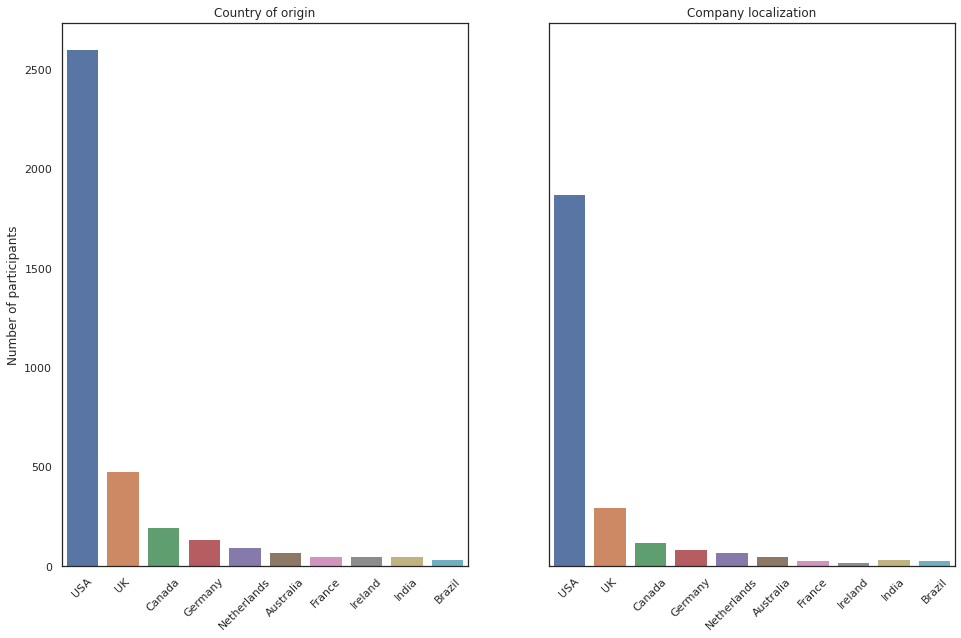

In [ ]:
#@title
fig, axes = plt.subplots(1, 2, figsize=(16,10), sharey=True)

sns.barplot(ax=axes[0], x='Country', y='Nr_of_participants_x', 
                    data=origin_country.head(10))
sns.barplot(ax=axes[1], x='Country', y='Nr_of_participants_y', 
                    data=origin_country.head(10))

axes[0].tick_params(axis="x", rotation=45)
axes[1].tick_params(axis="x", rotation=45)tab
axes[0].set(xlabel='', ylabel='Number of participants', 
            title='Country of origin')
axes[1].set(xlabel='', ylabel='', title='Company localization');


Checking if the respondents work in the same country that were born.

In [ ]:
origin_vs_location = pd.read_sql_query(
    '''
    SELECT a.UserID, 
           a.AnswerText AS Live, 
           b.AnswerText AS Work,
      CASE WHEN a.AnswerText == b.AnswerText THEN 'TRUE' 
           ELSE 'FALSE' END AS LIVE_WHERE_WORK
    FROM Answer a
    INNER JOIN Answer b ON a.UserID = b.UserID
    WHERE a.QuestionID = 3 AND b.QuestionID = 50;
    ''', con)

In [ ]:
#@title
origin_vs_location

,UserID,Live,Work,LIVE_WHERE_WORK
0,1261,United Kingdom,United Kingdom,TRUE
1,1262,United States of America,United States of America,TRUE
2,1263,United Kingdom,United Kingdom,TRUE
3,1264,United Kingdom,United Kingdom,TRUE
4,1265,United States of America,United States of America,TRUE
...,...,...,...,...
2953,4214,India,India,TRUE
2954,4215,United States of America,United States of America,TRUE
2955,4216,India,India,TRUE
2956,4217,India,India,TRUE


In [ ]:
origin_vs_location['LIVE_WHERE_WORK'].value_counts()

TRUE     2909
FALSE      49
Name: LIVE_WHERE_WORK, dtype: int64

The majority of interviewees live and work from USA. The second country in case of popularity is the UK. Top 10 countries for each of the queries show almost the same results. 

Only 49 out of 2958 people who answered those questions don't work in the country where they live.

### The size of the organization

In [ ]:
size_company = pd.read_sql_query(
    '''
    SELECT AnswerText as Size_of_company, 
           COUNT(AnswerText) as Count
    FROM Answer 
    WHERE QuestionID = 8
    GROUP BY AnswerText;
    ''', con)

In [ ]:
size_company

,Size_of_company,Count
0,-1,504
1,1-5,254
2,100-500,788
3,26-100,824
4,500-1000,247
5,6-25,689
6,More than 1000,912


In [ ]:
replace_values_size = {'-1': 'Not provided', '1-5': 'A 1-5',
                    '6-25': 'B 6-25', '26-100': 'C 26-100', 
                    '100-500': 'D 100-500', '500-1000': 'E 500-1000', 
                    'More than 1000': 'F >1000'}

size_company = size_company.replace(
    {'Size_of_company': replace_values_size})

In [ ]:
size_company = size_company.sort_values(by='Size_of_company')

In [ ]:
#@title
size_company

,Size_of_company,Count
1,A 1-5,254
5,B 6-25,689
3,C 26-100,824
2,D 100-500,788
4,E 500-1000,247
6,F >1000,912
0,Not provided,504


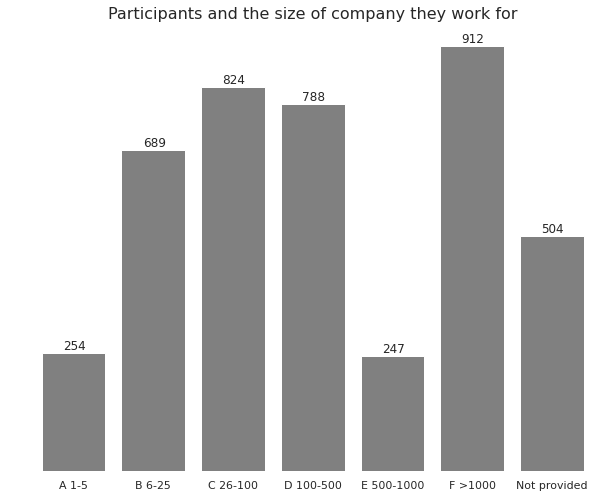

In [ ]:
barplot(df_plot=size_company, x='Size_of_company', y='Count', color='grey')

plt.subplots_adjust(top=0.9)
plt.title('Participants and the size of company they work for',
          fontdict={'fontsize': 16})
plt.ylabel(' ');

Most of participants work in companies that hire more that 5 people, which means that these people work in teams. More that a 1000 people work in big organizations, where usually is specific working environment.

###Tech character of organization

In [ ]:
tech_organization = pd.read_sql_query(
    '''
    SELECT AnswerText as Tech_organization, 
           SurveyID, 
           COUNT(AnswerText) AS Nr_of_participants
    FROM Answer 
    WHERE QuestionID = 9 
    GROUP BY AnswerText, SurveyID
    ORDER BY SurveyID;
    ''', con)

In [ ]:
tech_org_year = questions_answers.query("questionid == 9")
tech_org_year.groupby("UserID")

replace_values_yes_no = {'0': 'No', '1': 'Yes', '-1': 'Not provided'}

tech_org_year = tech_org_year.replace(
    {'AnswerText': replace_values_yes_no})


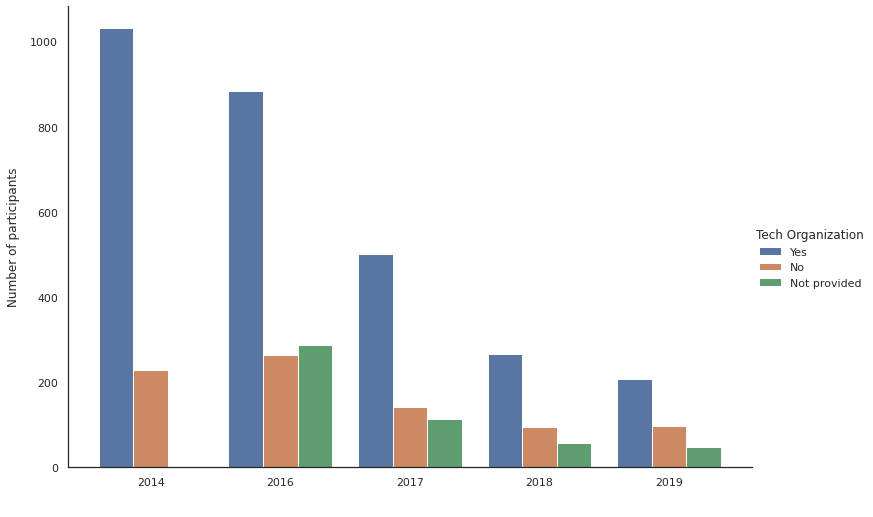

In [ ]:
g = sns.catplot(x='SurveyID', data=tech_org_year, kind='count', 
                hue='AnswerText',
                height=7.27, aspect=10.7/7.27)

g.set_axis_labels(' ', 'Number of participants', labelpad=10)
g.legend.set_title('Tech Organization')
g.ax.margins(.05)

The majority of people who took part in surveys work for tech companies.

In [ ]:
IT_role = pd.read_sql_query(
    '''
    SELECT AnswerText as IT_role, 
           COUNT(AnswerText) AS Nr_of_participants
    FROM Answer 
    WHERE QuestionID = 13
    GROUP BY AnswerText;
    ''', con)

In [ ]:
IT_role

,IT_role,Nr_of_participants
0,-1,1387
1,0,100
2,1,1471


People who took part in surveys have IT role or didn't provide the information about that (so it relates to the aim of the survey).

### Race of the respondents

In [ ]:
race_by_year = questions_answers.query("questionid == 89")
race_by_year.groupby("UserID")
display(race_by_year)

,AnswerText,SurveyID,UserID,questionid,questiontext
171141,-1,2017,2694,89,What is your race?
171142,-1,2017,2695,89,What is your race?
171143,White,2017,2696,89,What is your race?
171144,White,2017,2697,89,What is your race?
171145,More than one of the above,2017,2698,89,What is your race?
...,...,...,...,...,...
230336,-1,2019,4214,89,What is your race?
230337,White,2019,4215,89,What is your race?
230338,-1,2019,4216,89,What is your race?
230339,-1,2019,4217,89,What is your race?


In [ ]:
replace_values_minus_one = {'-1': 'Not provided'}

race_by_year = race_by_year.replace(
    {'AnswerText': replace_values_minus_one})

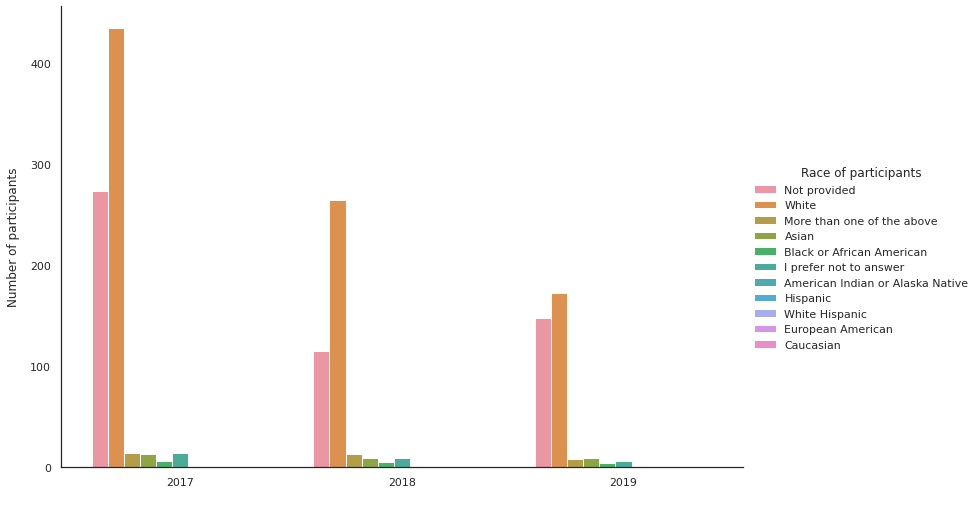

In [ ]:
g = sns.catplot(x='SurveyID', data=race_by_year, kind='count', hue='AnswerText',
                height=7.27, aspect=10.7/7.27)

g.set_axis_labels(' ', 'Number of participants', labelpad=10)
g.legend.set_title('Race of participants')
g.ax.margins(.05)

The majority of particpants are white or didn't provide information about their race.

###Remote working

In [ ]:
remote = pd.read_sql_query(
    '''
    SELECT AnswerText as Remote, 
           SurveyID, 
           COUNT(AnswerText) AS Nr_of_participants
    FROM Answer 
    WHERE QuestionID = 93 OR QuestionID = 118
    GROUP BY AnswerText, SurveyID
    ORDER BY SurveyID;
    ''', con)

In [ ]:
remote

,Remote,SurveyID,Nr_of_participants
0,No,2014,884
1,Yes,2014,376
2,Always,2016,343
3,Never,2016,333
4,Sometimes,2016,757


Only in 2014 and 2016 there was a question about remote mode of working. A majority of people worked in the office. 

**General conclusions.**

The typical respondent for the mental tech survey is:
* male
* 34-year-old
* white
* work and live in USA
* employed in a tech company and has an IT role.




---



#Employer care

Checking what is the company attitude to mental health issues.

###Checking if companies offer mental health coverage as a benefit for employees.


In [ ]:
mental_health_coverage = pd.read_sql_query(
    '''
     WITH summary AS (
      SELECT SurveyID, Count(AnswerText) AS All_participants
      FROM Answer
      WHERE QuestionID = 10
      GROUP BY SurveyID
    )
    SELECT a.AnswerText as Coverage, 
           a.SurveyID, 
           COUNT(a.AnswerText)*100/s.All_participants AS Ratio
    FROM Answer a
    INNER JOIN summary s
    ON a.SurveyID = s.SurveyID
    WHERE QuestionID = 10
    GROUP BY a.SurveyID, a.AnswerText;
    ''', con)

In [ ]:
replace_values_dont_know = {'-1': 'Answer not provided', 
                            "Don't know": "I don't know"}
mental_health_coverage = mental_health_coverage.replace(
    {'Coverage': replace_values_dont_know})

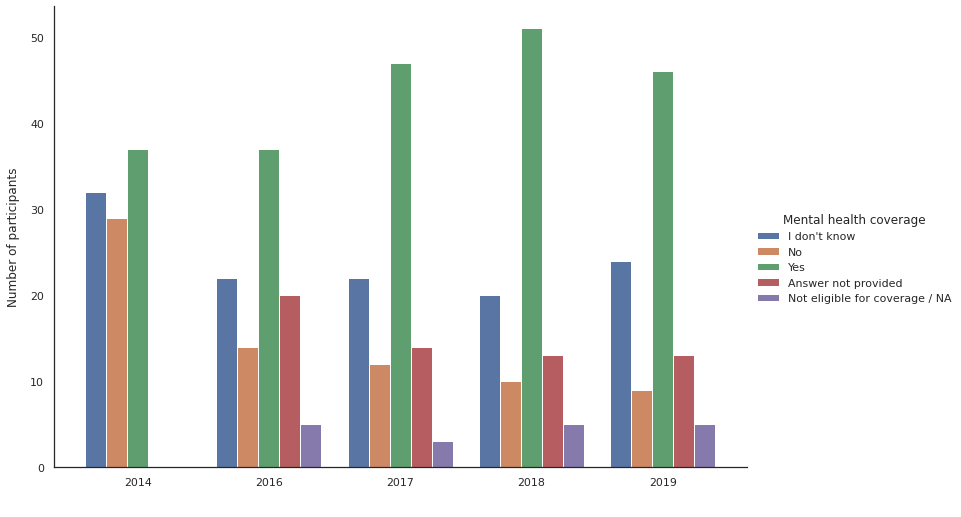

In [ ]:
g = sns.catplot(x='SurveyID', y='Ratio', kind='bar',
                data=mental_health_coverage, hue='Coverage', 
                height=7.27, aspect=10.7/7.27)

g.set_axis_labels(' ', 'Number of participants', labelpad=10)
g.legend.set_title('Mental health coverage')
g.ax.margins(.05)

In 2014 there was more or less an equal number of companies that cover mental health issues among employees. This ratio changed for the better in the following years. However, there are a high number of people who have no idea about whether this option exists in their company or not.

###Materials about mental health provided by companies

In [ ]:
mental_health_materials = pd.read_sql_query(
    '''
    SELECT AnswerText as Answer, 
           COUNT(AnswerText) AS Nr_of_participants
    FROM Answer 
    WHERE QuestionID = 16
    GROUP BY AnswerText
    ORDER BY SurveyID, COUNT(AnswerText);
    ''', con)

In [ ]:
mental_health_materials = mental_health_materials.replace(
    {'Answer': replace_values_minus_one})
mental_health_materials

,Answer,Nr_of_participants
0,Not provided,504
1,I don't know,668
2,Yes,702
3,No,1084


In majority of companies, people don't find information about how to solve mental health issues or they don't know where to look for them.

###Does mental health have the same importance as physical among companies?

In [ ]:
physical_vs_mental_health_importance = pd.read_sql_query(
    '''
    SELECT a.UserID, a.AnswerText AS Physical, b.AnswerText AS Mental,
      CASE WHEN a.AnswerText > b.AnswerText THEN 'TRUE' 
        WHEN a.AnswerText == b.AnswerText THEN 'EQUAL' 
        ELSE 'FALSE' END AS Physical_vs_mental
    FROM Answer a
    INNER JOIN Answer b ON a.UserID = b.UserID
    WHERE a.QuestionID = 64 AND b.QuestionID = 65;
    ''', con)

In [ ]:
physical_vs_mental_health_importance['Physical_vs_mental'].value_counts()

EQUAL    675
TRUE     653
FALSE    197
Name: Physical_vs_mental, dtype: int64

We would expect that mental health has the same importance as the physical health. Unfortunately, only in 40% of cases this is true. In most cases physical health is more important.

**General conclusions**

Some companies treat mental health with the same importance as physical health, but it is not a common practice. There is a lack of information about mental help for employees.



---



#Mental health's profile of participants

###Family history of mental health's problem 

Checking if respondents report family issues regarding mental health and also if the respondents themselves were looking for psychological help.

In [ ]:
family_history = pd.read_sql_query(
    '''
     WITH summary AS (
      SELECT SurveyID, Count(AnswerText) AS All_participants
      FROM Answer
      WHERE QuestionID = 6
      GROUP BY SurveyID
    )
    SELECT a.AnswerText as Answer, 
           a.SurveyID, 
           COUNT(a.AnswerText)*100/s.All_participants AS Ratio
    FROM Answer a
    INNER JOIN summary s
    ON a.SurveyID = s.SurveyID
    WHERE QuestionID = 6
    GROUP BY a.SurveyID, a.AnswerText;
    ''', con)

In [ ]:
mental_treatement = pd.read_sql_query(
    '''
     WITH summary AS (
      SELECT SurveyID, Count(AnswerText) AS All_participants
      FROM Answer
      WHERE QuestionID = 7
      GROUP BY SurveyID
    )
    SELECT a.AnswerText as Answer, 
           a.SurveyID, 
           COUNT(a.AnswerText)*100/s.All_participants AS Ratio
    FROM Answer a
    INNER JOIN summary s
    ON a.SurveyID = s.SurveyID
    WHERE QuestionID = 7
    GROUP BY a.SurveyID, a.AnswerText;
    ''', con)

In [ ]:
replace_values_yes_no = {'0': 'No', '1': 'Yes'}
mental_treatement = mental_treatement.replace({
    'Answer': replace_values_yes_no
})

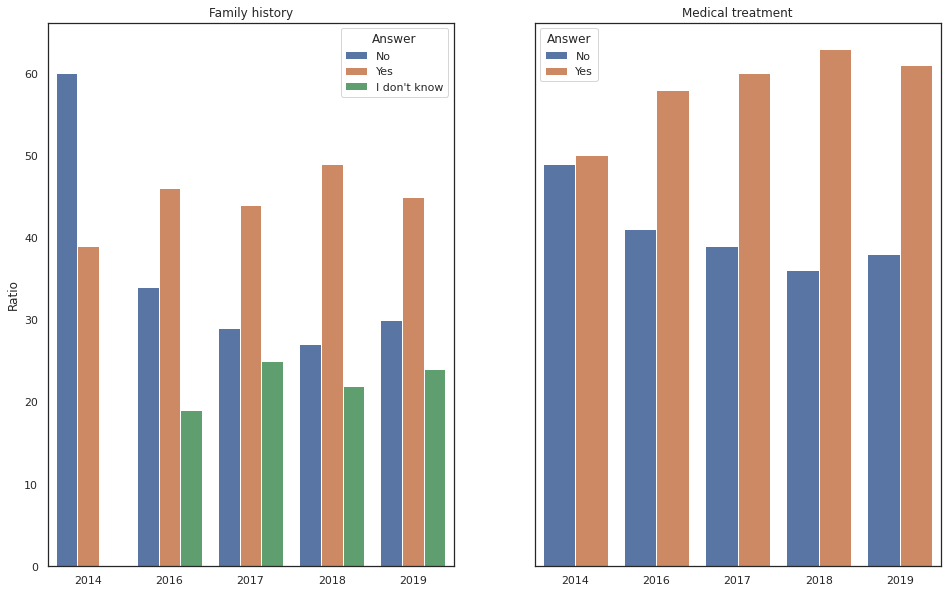

In [ ]:
#@title
fig, axes = plt.subplots(1, 2, figsize=(16,10), sharey=True)

sns.barplot(ax=axes[0], x='SurveyID', y='Ratio',
                data=family_history, hue='Answer')

sns.barplot(ax=axes[1], x='SurveyID', y='Ratio',
                data=mental_treatement, hue='Answer')

axes[0].set(xlabel='', ylabel='Ratio', title='Family history')
axes[1].set(xlabel='', ylabel='', title='Medical treatment');


In 2014 about 60% of people reported that didn't have any family history regarding mental health. From 2016 there was additional option to choose - 'I don't know' so the distribution slightly differs. Nevertheless, the amount of people who have mental health issues in family history is significant. 

Regarding medical treatment, in every year, at least half people that took part in survey (or more) reported the fact they sought for medical treatment.

###People current mental state

In [ ]:
#@title
mental_disorder = pd.read_sql_query(
    '''
    SELECT AnswerText as Answer, 
           SurveyID, 
           COUNT(AnswerText) AS Nr_of_participants
    FROM Answer 
    WHERE QuestionID = 32 OR QuestionID = 33 OR QuestionID = 34
    GROUP BY SurveyID, AnswerText
    ORDER BY SurveyID;
    ''', con)

In [ ]:
mental_disorder_ratio = pd.read_sql_query(
    '''
    WITH summary AS (
      SELECT SurveyID, Count(AnswerText) AS All_participants
      FROM Answer
      WHERE QuestionID = 32 OR QuestionID = 33 OR QuestionID = 34
      GROUP BY SurveyID
    )
    SELECT a.AnswerText as Answer, 
           a.SurveyID, 
           COUNT(a.AnswerText)*100/s.All_participants AS Ratio
    FROM Answer a
    INNER JOIN summary s
    ON a.SurveyID = s.SurveyID
    WHERE QuestionID = 32 OR QuestionID = 33 OR QuestionID = 34
    GROUP BY a.SurveyID, a.AnswerText
    ORDER BY a.SurveyID;
    ''', con)

In [ ]:
mental_disorder = mental_disorder.replace({
    'Answer': replace_values_minus_one
})

In [ ]:
mental_disorder_ratio = mental_disorder_ratio.replace({
    'Answer': replace_values_minus_one
})

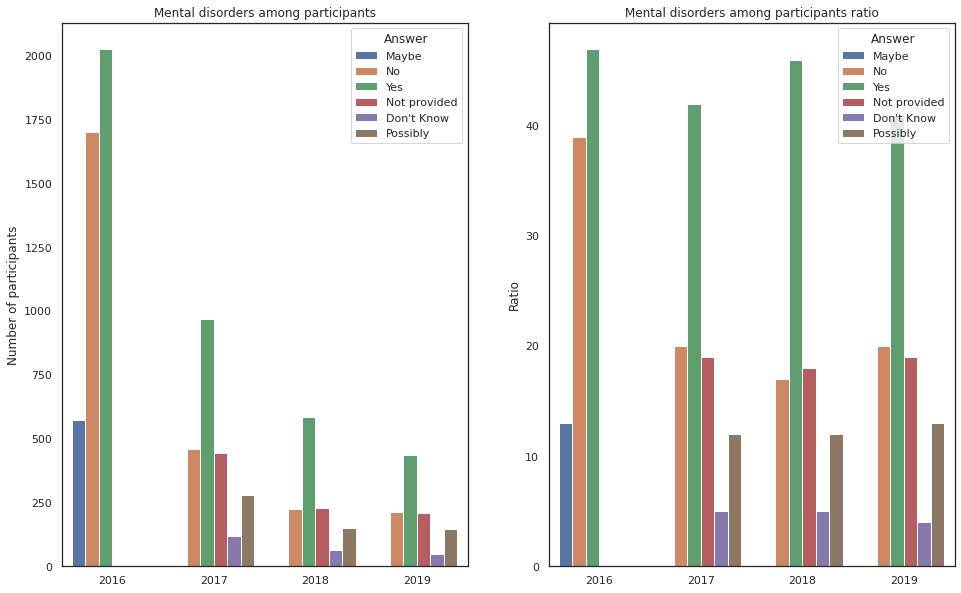

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,10))

sns.barplot(ax=axes[0], x='SurveyID', y='Nr_of_participants',
                data=mental_disorder, hue='Answer')

sns.barplot(ax=axes[1], x='SurveyID', y='Ratio',
                data=mental_disorder_ratio, hue='Answer')

axes[0].set(xlabel='', ylabel='Number of participants', 
            title='Mental disorders among participants')
axes[1].set(xlabel='', ylabel='Ratio', 
            title='Mental disorders among participants ratio');

The possible answer options differ across years, so to understand the general mental state among participants, I treat 'maybe' and 'possibly' equally and interpret it as the fact that respondents suggest that they may have a problem/they don't feel well. 

Taking that into account, the majority of people struggle with mental condition.

###Impact of mental health issues on productivity

In [ ]:
productivity = pd.read_sql_query(
    '''
    WITH summary AS (
      SELECT SurveyID, Count(AnswerText) AS All_participants
      FROM Answer
      WHERE QuestionID = 54
      GROUP BY SurveyID
    )
    SELECT a.AnswerText AS Answer, 
           a.SurveyID, 
           COUNT(a.AnswerText)*100/s.All_participants AS Ratio
    FROM Answer a
    INNER JOIN summary s
    ON a.SurveyID = s.SurveyID
    WHERE QuestionID = 54 
    GROUP BY a.SurveyID, a.AnswerText
    ORDER BY a.SurveyID;
    ''', con)

In [ ]:
productivity = productivity.replace({
    'Answer': replace_values_minus_one
})

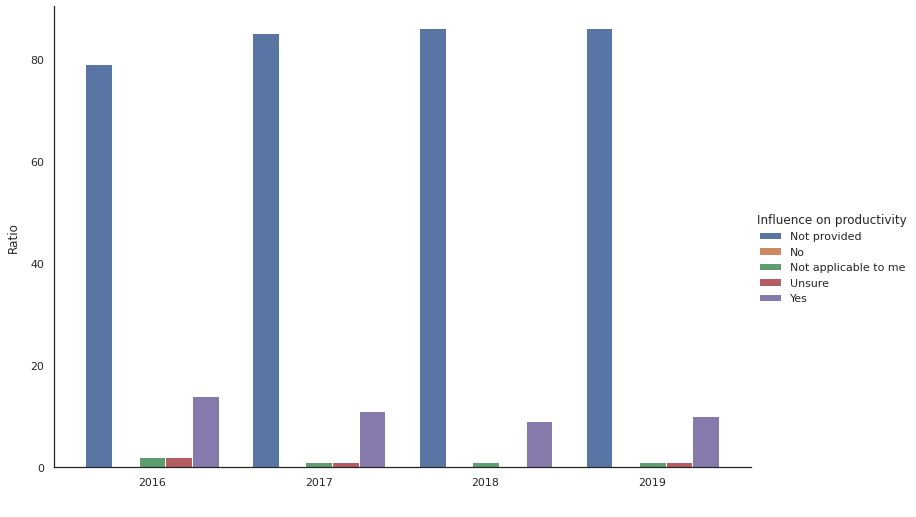

In [ ]:
g = sns.catplot(x='SurveyID', y='Ratio', kind='bar',
                data=productivity, hue='Answer', 
                height=7.27, aspect=10.7/7.27)

g.set_axis_labels(' ', 'Ratio', labelpad=10)
g.legend.set_title('Influence on productivity')
g.ax.margins(.05)

These people who provided information about their productivity, almost all stated that their mental health causes productivity loss. 

##Types of mental health diseases

In [ ]:
mental_diseases = pd.read_sql_query(
    '''
    SELECT AnswerText as Answer, 
           SurveyID, 
           COUNT(AnswerText) AS Nr_of_participants
    FROM Answer 
    WHERE QuestionID = 115
    GROUP BY SurveyID, AnswerText
    ORDER BY SurveyID;
    ''', con)

In [ ]:
mental_diseases = mental_diseases.replace(
    {'Answer': replace_values_minus_one}
).sort_values(by='Nr_of_participants', ascending=False)
mental_diseases.head(10)

,Answer,SurveyID,Nr_of_participants
0,Not provided,2016,865
18,"Mood Disorder (Depression,...",2016,412
3,Anxiety Disorder (Generali...,2016,345
5,Attention Deficit Hyperact...,2016,121
24,Post-traumatic Stress Diso...,2016,69
19,Obsessive-Compulsive Disorder,2016,45
31,Substance Use Disorder,2016,39
30,Stress Response Syndromes,2016,38
22,Personality Disorder (Bord...,2016,35
2,Addictive Disorder,2016,35


In 2016 there was a question that checked what kind of diseases people suffer from. The most common are mood and anxiety disorders, attention deficit and PTSD.

**General conclusions**

A majority of people struggle with some mental health issues, reported looking for professional help and also mentioned that it influences their productivity at work.

#Checking the impact of the age, the gender and the size of the company on the mental health issues.

How many people in a specific age group have some mental issues?

In [ ]:
mental_disorders_age = pd.read_sql_query(
    '''
    WITH Age AS (
        SELECT UserID, CAST(AnswerText AS int) As Age
        FROM Answer
        WHERE QuestionID = 1
        ORDER BY 2
        ),
        AgeGroup AS (
        SELECT UserID, 
           (CASE
              WHEN Age <= 20 THEN '12-20s'
              WHEN Age > 21 AND Age <= 30 THEN '20s'
              WHEN Age > 31 AND Age <= 40 THEN '30s'
              WHEN Age > 41 AND Age <= 50 THEN '40s'
              WHEN Age > 51 AND Age <= 60 THEN '50s'
              ELSE '60s+' 
            END) AS AgeGroup
      FROM Age 
      ), 
      MentalCondition AS (
        SELECT UserID,
               'Had in Past' AS Status,
               (CASE
                  WHEN AnswerText = 'Yes' THEN 1
                  ELSE 0
               END) AS Answer
        FROM Answer
        WHERE QuestionID = 32
        UNION ALL
        SELECT UserID,
                "Currently Have" AS Status, 
                (CASE
                    WHEN AnswerText = 'Yes' THEN 1
                    ELSE 0
                END) AS Answer
        FROM Answer
        WHERE QuestionID = 33
        UNION ALL
        SELECT UserID,
                "Been Diagnosed" AS Status, 
                (CASE
                    WHEN AnswerText = 'Yes' THEN 1
                    ELSE 0
                    END) AS Answer
            FROM Answer
            WHERE QuestionID = 34
        )        
        SELECT *
        FROM
            (SELECT AgeGroup, COUNT(y.UserID) AS YES
            FROM AgeGroup
            JOIN
                (SELECT UserID
                FROM MentalCondition
                GROUP BY UserID
                HAVING SUM(Answer) > 0) AS y USING(UserID)
             GROUP BY 1) Yes
        JOIN
            (SELECT AgeGroup, COUNT(n.UserID) AS NO
            FROM AgeGroup
            JOIN
                (SELECT UserID
                FROM MentalCondition
                GROUP BY UserID
                HAVING SUM(Answer) = 0) AS n USING(UserID)
             GROUP BY 1) No
        USING(AgeGroup)
      ''', con)
  

In [ ]:
 mental_disorders_age

,AgeGroup,YES,NO
0,12-20s,13,17
1,20s,555,450
2,30s,628,496
3,40s,236,178
4,50s,53,44
5,60s+,163,125


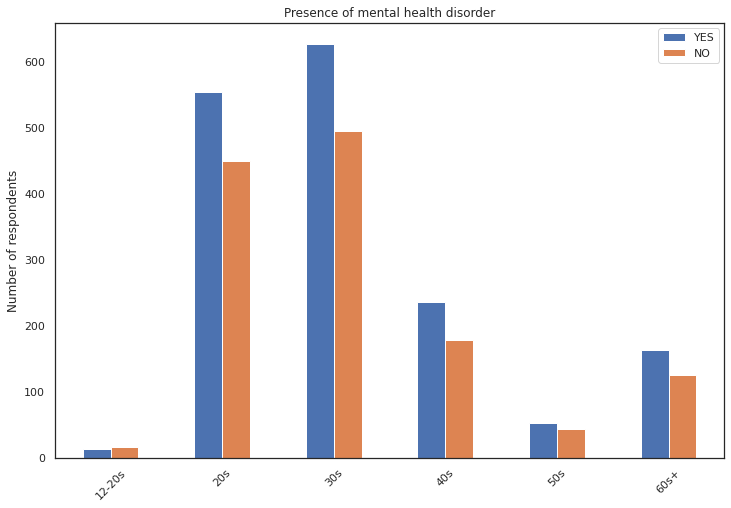

In [ ]:
mental_disorders_age.plot(x='AgeGroup', y=['YES', 'NO'], kind='bar',
                          title='Presence of mental health disorder', 
                          xlabel='', ylabel='Number of respondents', 
                          figsize=(12,8), rot=45);

In [ ]:
#@title
mental_disorders_gender = pd.read_sql_query(
    '''
    WITH Gender AS (
        SELECT UserID, 
           (CASE
            WHEN UPPER(AnswerText) LIKE '%FEM%' THEN 'Female'
            WHEN UPPER(AnswerText) LIKE '%WOMAN%' THEN 'Female'
            WHEN UPPER(AnswerText) LIKE '%MALE%' THEN 'Male'
            WHEN UPPER(AnswerText) LIKE '%MASCUL%' THEN 'Male'
            ELSE 'Other' 
            END) AS GenderType
      FROM Answer
      WHERE QuestionID = 2
      ORDER BY 2 
      ), 
      MentalCondition AS (
        SELECT UserID,
               'Had in Past' AS Status,
               (CASE
                  WHEN AnswerText = 'Yes' THEN 1
                  ELSE 0
               END) AS Answer
        FROM Answer
        WHERE QuestionID = 32
        UNION ALL
        SELECT UserID,
                "Currently Have" AS Status, 
                (CASE
                    WHEN AnswerText = 'Yes' THEN 1
                    ELSE 0
                END) AS Answer
        FROM Answer
        WHERE QuestionID = 33
        UNION ALL
        SELECT UserID,
                "Been Diagnosed" AS Status, 
                (CASE
                    WHEN AnswerText = 'Yes' THEN 1
                    ELSE 0
                    END) AS Answer
            FROM Answer
            WHERE QuestionID = 34
        )        
        SELECT *
        FROM
            (SELECT GenderType, COUNT(y.UserID) AS YES
            FROM Gender
            JOIN
                (SELECT UserID
                FROM MentalCondition
                GROUP BY UserID
                HAVING SUM(Answer) > 0) AS y USING(UserID)
             GROUP BY 1) Yes
        JOIN
            (SELECT GenderType, COUNT(n.UserID) AS NO
            FROM Gender
            JOIN
                (SELECT UserID
                FROM MentalCondition
                GROUP BY UserID
                HAVING SUM(Answer) = 0) AS n USING(UserID)
             GROUP BY 1) No
        USING(GenderType)
      ''', con)

In [ ]:
mental_disorders_gender

,GenderType,YES,NO
0,Female,541,258
1,Male,1037,1024
2,Other,70,28


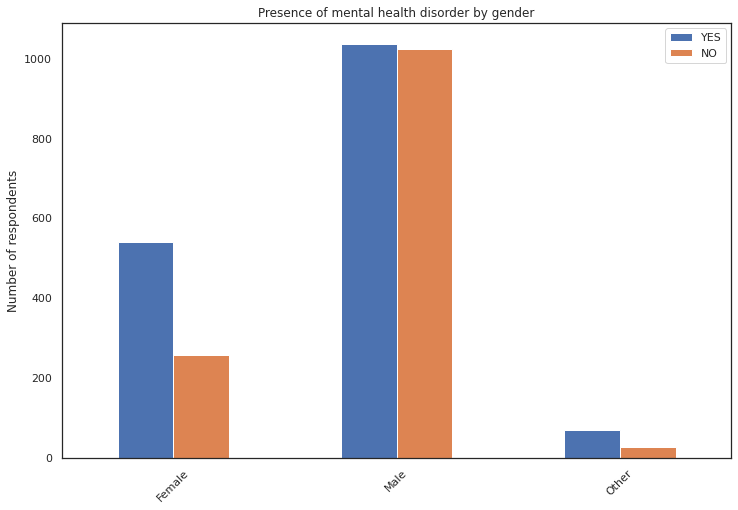

In [ ]:
mental_disorders_gender.plot(x='GenderType', y=['YES', 'NO'], kind='bar',
                          title='Presence of mental health disorder by gender', 
                          xlabel='', ylabel='Number of respondents', 
                          figsize=(12,8), rot=45);

In [ ]:
#@title
mental_disorders_size = pd.read_sql_query(
    '''
    WITH Size AS (
        SELECT UserID,
        (CASE
            WHEN AnswerText LIKE '-1' THEN 'Not provided'
            WHEN AnswerText LIKE '1-5'  THEN 'A 1-5'
            WHEN AnswerText LIKE '6-25'  THEN 'B 6-25'
            WHEN AnswerText LIKE '25-100'  THEN 'C 25-100'
            WHEN AnswerText LIKE '100-500'  THEN 'D 100-500'
            WHEN AnswerText LIKE '500-1000'  THEN 'E 500-1000'
            ELSE 'F 1000+' 
            END) AS SizeType
        FROM Answer
        WHERE QuestionID = 8
        ORDER BY 2
      ), 
      MentalCondition AS (
        SELECT UserID,
               'Had in Past' AS Status,
               (CASE
                  WHEN AnswerText = 'Yes' THEN 1
                  ELSE 0
               END) AS Answer
        FROM Answer
        WHERE QuestionID = 32
        UNION ALL
        SELECT UserID,
                "Currently Have" AS Status, 
                (CASE
                    WHEN AnswerText = 'Yes' THEN 1
                    ELSE 0
                END) AS Answer
        FROM Answer
        WHERE QuestionID = 33
        UNION ALL
        SELECT UserID,
                "Been Diagnosed" AS Status, 
                (CASE
                    WHEN AnswerText = 'Yes' THEN 1
                    ELSE 0
                    END) AS Answer
            FROM Answer
            WHERE QuestionID = 34
        )        
        SELECT *
        FROM
            (SELECT SizeType, COUNT(y.UserID) AS YES
            FROM Size
            JOIN
                (SELECT UserID
                FROM MentalCondition
                GROUP BY UserID
                HAVING SUM(Answer) > 0) AS y USING(UserID)
             GROUP BY 1) Yes
        JOIN
            (SELECT SizeType, COUNT(n.UserID) AS NO
            FROM Size
            JOIN
                (SELECT UserID
                FROM MentalCondition
                GROUP BY UserID
                HAVING SUM(Answer) = 0) AS n USING(UserID)
             GROUP BY 1) No
        USING(SizeType)
      ''', con)
  

In [ ]:
mental_disorders_size

,SizeType,YES,NO
0,A 1-5,46,46
1,B 6-25,203,196
2,D 100-500,354,258
3,E 500-1000,99,87
4,F 1000+,660,505
5,Not provided,286,218


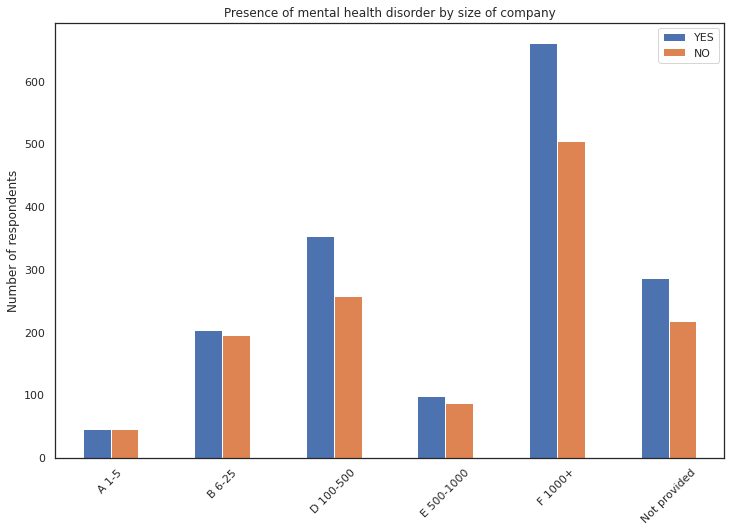

In [ ]:
mental_disorders_size.plot(x='SizeType', y=['YES', 'NO'], kind='bar',
                  title='Presence of mental health disorder by size of company', 
                  xlabel='', ylabel='Number of respondents', 
                  figsize=(12,8), rot=45);



---



#General conclusions

EDA of mental health surveys for tech professionals presents the following conclusions.

1. Character of the surveys:
- Surveys took place in 2014, 2016, and 2017-2019
- The number of questions changed across the years (surveys weren't equal)
- The number of participants drops year by year

2. Profile of respondents:
- the average age of the respondents is 34, however, there are several tech professionals significantly younger and elder than that
- typical respondent to the survey - male, white, living and working in the US, in a rather big company (more than 100people onboard)
- most of the respondents has an IT-related role in tech-related company.

3. Profile of the mental health employer care:
- some companies provide mental health coverage for employees, but it is not a common practice
- physical and mental health is not always treated equally - physical health is more important in many cases
- companies declare to provide materials about mental health but usually, people don't know where to look for them, so effectively there is no place for employees to look for help

4. Mental health profile of respondents:
- the amount of people who has some family history regarding mental health is significant
- at least 50% of people declare they sought for medical treatment
- the majority of people struggle with some mental health issues
- people believe that their mental state influence their productivity at work

5. Mental health problems across age groups, gender and the size of the company:
- in each of the age groups (except <20) more people reports mental health issues than people who don't suffer from that
- Across gender, the trend is exactly the same (higher number of 'yes'), however, women reports significantly more mental health issues than men (2:1 for women, 1:1 for men)
- Size of company doesn't influence the distribution of mental health problems. No metter of the number of people onboard, in more than half of the cases people report some issues. Only small companies have equal distribution.

